# Тема курсовой: исследование целевой аудитории при помощи методов математической статистики

## Содержание:

### Введение
#### Цель курсовой
#### Задачи
#### Описание выборки

### 1. Просмотр графиков по данным
#### 1.1 Графики городов
#### 1.2 Графики полов
#### 1.3 Графики возрастов

### 2. Математическая оценка данных
#### 2.1. Подсчёт основных метрики по возрасту
#### 2.2. Подсчёт полной вероятности - формула Байеса

### Свойства Target 

### 3. Проверка гипотез
#### 3.1 Гипотеза 1
#### 3.2 Гипотеза 2

### Вывод

# Введение

__Цель курсовой:__ изучить среднестатистического участника из нескольких групп одной тематики, сформировать свойства целевой аудитории (target) и попытаться предсказать - с какой вероятностью случайный пользователь социальной сети вступивший в группу №1 будет иметь свойства целевой аудитории.

__Задачи:__

    1. Загрузить данные и построить графики, для визуального анализа target по следующим показателям: 
    город, пол, возраст.
    
    2. Используя статистические метрики исследовать возрастные показатели аудитории каждой группы.
    
    3. Подсчитать состав аудитории по каждой группе
    
    4. Сформировать свойства target, общие для всех групп 
    
    5. Проверка некоторых гипотез для оценки того, насколько точно новый человек будет иметь свойства сформированной целевой аудитории. 
    
__Описание выборки:__

Все выборки собирались из открытых источников предоставляемых API в vk.com. Данные содержат в себе только ту информацию, которую пользователи vk.com сами предостапвляли в открытый доступ.

При первичной обработке данных была удалена такая информация, как Имя и Фамилия пользователей. Контактыне данные, ссылки и id пользователей не запрашивались. Названия организаций владеющих группами изменены.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pylab import rcParams

import warnings

In [2]:
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
files = 'res_w.pkl', 'res_i.pkl', 'res_m.pkl', 'res_u.pkl'

df1 = pd.read_pickle(files[0])
df2 = pd.read_pickle(files[1])
df3 = pd.read_pickle(files[2])
df4 = pd.read_pickle(files[3])

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
id                  1299 non-null int64
sex                 1299 non-null object
bdate               464 non-null object
city                1055 non-null object
country             1161 non-null object
university_name     409 non-null object
faculty_name        409 non-null object
graduation          409 non-null float64
education_form      104 non-null object
education_status    94 non-null object
relation_partner    44 non-null object
deactivated         24 non-null object
age                 464 non-null object
children            1299 non-null int64
dtypes: float64(1), int64(2), object(11)
memory usage: 142.2+ KB


# 1. Просмотр графиков по данным

### 1.1 Графики городов

In [4]:
cities1 = df1['city'].value_counts()
cities2 = df2['city'].value_counts()
cities3 = df3['city'].value_counts()
cities4 = df4['city'].value_counts()

cities = [cities1, cities2, cities3, cities4]

In [5]:
def barsh(array: list, top=None, name=''):
    
    fig, ax = plt.subplots(ncols=2, nrows=2)

    ax1,ax2,ax3,ax4 = ax.flatten()

    ax1.barh(array[0][:top].index, array[0][:top].values)
    ax1.set_title(f'1 {name}')

    ax2.barh(array[1][:top].index, array[1][:top].values)
    ax2.set_title(f'2 {name}')

    ax3.barh(array[2][:top].index, array[2][:top].values)
    ax3.set_title(f'3 {name}')

    ax4.barh(array[3][:top].index, array[3][:top].values)
    ax4.set_title(f'4 {name}')

    fig.set_size_inches(10, 3)

    plt.subplots_adjust(wspace=0.6, hspace=0.8)
    plt.show()

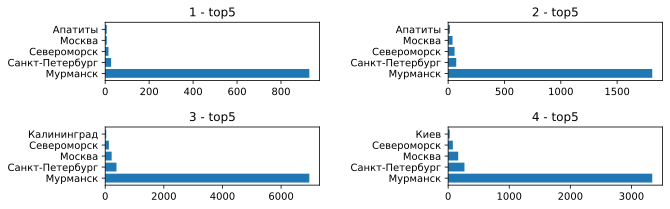

In [6]:
barsh(array=cities,
      top=5,
      name='- top5')

Как видно на всех 6 графиках, в выбранных группах преобладает аудитория из Мурманска, сложим отдельно значения по Мурманску и по остальным городам, что бы увеличить выборку.

In [7]:
murman_sum = sum([cities1['Мурманск'], cities2['Мурманск'], cities3['Мурманск'], cities4['Мурманск']])
cities_sum = sum(map(sum, [cities1[1:], cities2[1:], cities3[1:], cities4[1:]]))

count_sities = pd.Series({'murmansk': murman_sum, 'another_cities': cities_sum})

count_sities

murmansk          13046
another_cities     3457
dtype: int64

#### Теперь найдём вероятность того, что новый участник группы будет из Мурманска или из другого города

In [8]:
prob_cities = pd.Series({'murmansk': murman_sum/count_sities.sum(), 'another_cities': cities_sum/count_sities.sum()})

prob_cities

murmansk          0.790523
another_cities    0.209477
dtype: float64

### 1.2 Графики полов

In [9]:
sex1 = df1['sex'].value_counts()
sex2 = df2['sex'].value_counts()
sex3 = df3['sex'].value_counts()
sex4 = df4['sex'].value_counts()

sex = [sex1, sex2, sex3, sex4]

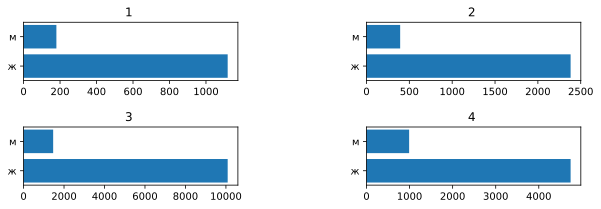

In [10]:
barsh(array=sex)

Соотношение мужчин и женщин на всех графиках почти одинаковая

In [11]:
male_sum = sum([sex1['м'], sex2['м'], sex3['м'], sex4['м']])
female_sum = sum([sex1['ж'], sex2['ж'], sex3['ж'], sex4['ж']])
count_sex = pd.Series({'female': female_sum, 'male': male_sum})

count_sex

female    18327
male       3026
dtype: int64

#### Теперь найдём вероятность того, что новый участник группы будет женщиной или мужчиной

In [12]:
prob_sexes = pd.Series({'female': female_sum/count_sex.sum(), 'male': male_sum/count_sex.sum()})

prob_sexes

female    0.858287
male      0.141713
dtype: float64

### 1.3 Графики возрастов

Сначало просмотрим выбросы

In [13]:
age1 = df1['age'].value_counts()
age2 = df2['age'].value_counts()
age3 = df3['age'].value_counts()
age4 = df4['age'].value_counts()

age = [age1, age2, age3, age4]

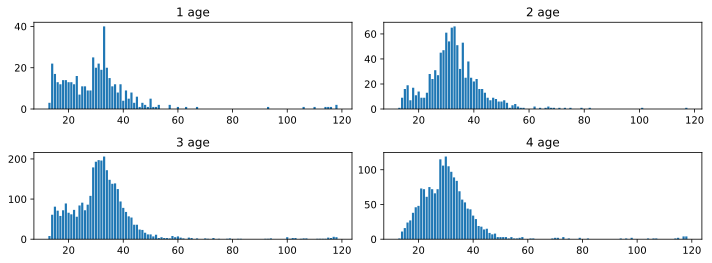

In [14]:
fig, ax = plt.subplots(ncols=2, nrows=2)

ax1,ax2,ax3,ax4 = ax.flatten()

ax1.bar(age1.index, age1.values)
ax1.set_title(f'1 age')

ax2.bar(age2.index, age2.values)
ax2.set_title(f'2 age')

ax3.bar(age3.index, age3.values)
ax3.set_title(f'3 age')

ax4.bar(age4.index, age4.values)
ax4.set_title(f'4 age')

fig.set_size_inches(12, 4)

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

Отрежим выбросы и построим графики ещё раз

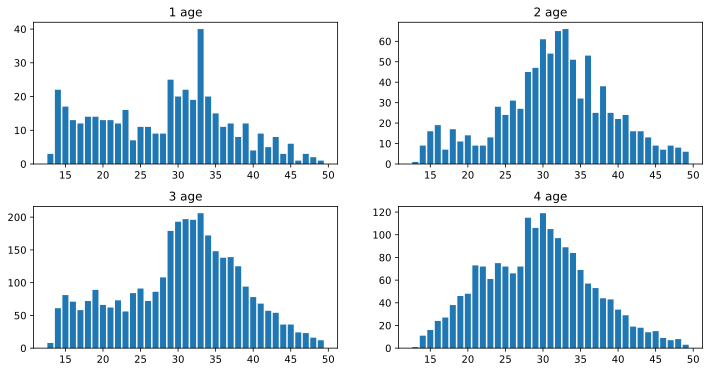

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=2)

ax1,ax2,ax3,ax4 = ax.flatten()

ax1.bar(age1[age1.index < 50].index, age1[age1.index < 50].values)
ax1.set_title(f'1 age')

ax2.bar(age2[age2.index < 50].index, age2[age2.index < 50].values)
ax2.set_title(f'2 age')

ax3.bar(age3[age3.index < 50].index, age3[age3.index < 50].values)
ax3.set_title(f'3 age')

ax4.bar(age4[age4.index < 50].index, age4[age4.index < 50].values)
ax4.set_title(f'4 age')

fig.set_size_inches(12, 6)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

Здесь можно заметить общую форму графиков - стремящуюся к нормальному распределению у всех кроме 1го - это связано с наименьшим числом наблюдений в первой выборке, поэтому попробуем увеличить бины. 

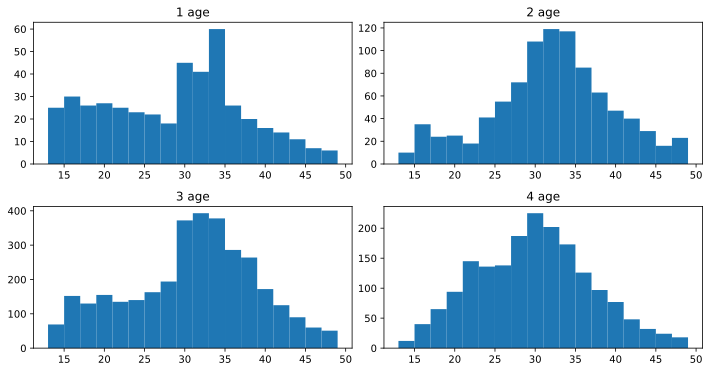

In [16]:
fig,ax = plt.subplots(ncols=2, nrows=2)

ax1, ax2, ax3, ax4 = ax.flatten()

ax1.hist(df1[df1['age']<50]['age'], bins=18)
ax1.set_title(f'1 age')

ax2.hist(df2[df2['age']<50]['age'], bins=18)
ax2.set_title(f'2 age')

ax3.hist(df3[df3['age']<50]['age'], bins=18)
ax3.set_title(f'3 age')

ax4.hist(df4[df4['age']<50]['age'], bins=18)
ax4.set_title(f'4 age')

fig.set_size_inches(12, 6)

plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

Теперь видно, что у 1го графика есть 2е спадающие вершины: в середине - эллемент свойственный всем графикам, и слева - похожий эллемент встречается и во 2м графике и "рудимент" этого эллемента в 3м графике. Это говорит о том, что первые 3 организации наиболее близки по сфере своей деятельности, но на разных этапах развития.


_Сложим выборки, после этого ещё раз просмотрим на график._

In [17]:
all_age = pd.concat([df1['age'], df2['age'], df3['age'], df4['age']], axis=0, ignore_index=True)

count_age = all_age.value_counts()
count_age.head()

33    401
30    393
31    378
32    377
29    357
Name: age, dtype: int64

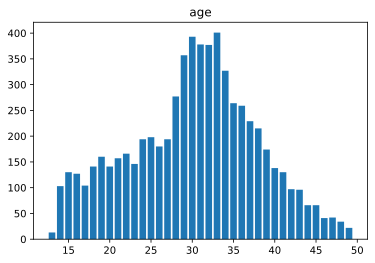

In [18]:
fig,ax = plt.subplots()

ax.bar(count_age[count_age.index < 50].index, count_age[count_age.index < 50].values)
ax.set_title(f'age')

plt.show()

##### Теперь возраст целевой аудитории видно более отчётливо, он входит в промежуток от 28 до 34 лет.

# 2. Математическая оценка данных

### 2.1. Подсчёт основных метрики по возрасту

Просмотрим математическое ожидание, дисперсию, среднее квадратическое отклонение, и квантили возраста участников в каждой группе.

In [19]:
def MDs(df: pd.Series):
    '''mean, median, variable, standard deviation'''
    
    print(
        f'mean\t\t = {df.mean()}\n'
        f'quantile 25%\t = {df.quantile(0.25)}\n'
        f'median\t\t = {df.quantile(0.5)}\n'
        f'quantile 75%\t = {df.quantile(0.75)}\n'
        f'variable\t = {df.var()}\n'
        f'std\t\t = {df.std()}\n'
        f'from\t\t = {df.mean()-df.std()}\n'
        f'before\t\t = {df.mean()+df.std()}'
    )

In [20]:
MDs(df1['age'])

mean		 = 30.48060344827586
quantile 25%	 = 21.0
median		 = 30.0
quantile 75%	 = 35.0
variable	 = 208.6691693974827
std		 = 14.445385747617912
from		 = 16.03521770065795
before		 = 44.92598919589378


$
M(X_1) = 30.48\\
\sigma(X_1) = 14.45
$

In [21]:
MDs(df2['age'])

mean		 = 32.8261316872428
quantile 25%	 = 28.0
median		 = 32.0
quantile 75%	 = 37.0
variable	 = 98.85027420715143
std		 = 9.942347519934687
from		 = 22.883784167308114
before		 = 42.768479207177485


$
M(X_2) = 32.82\\
\sigma(X_2) = 9.94
$

In [22]:
MDs(df3['age'])

mean		 = 32.179509379509376
quantile 25%	 = 25.0
median		 = 32.0
quantile 75%	 = 37.0
variable	 = 158.57862158370241
std		 = 12.592800386875924
from		 = 19.586708992633454
before		 = 44.7723097663853


$
M(X_3) = 32.18\\
\sigma(X_3) = 12.59
$

In [23]:
MDs(df4['age'])

mean		 = 30.721840296139607
quantile 25%	 = 24.0
median		 = 30.0
quantile 75%	 = 35.0
variable	 = 130.8739089924706
std		 = 11.440013504907702
from		 = 19.281826791231907
before		 = 42.16185380104731


$
M(X_4) = 30.72\\
\sigma(X_4) = 11.44
$

Видно, что в 1й выборке __самая молодая аудитория__ - 30,5 года, при этом у неё и __самый большой средний разброс__ по возрастам, от 16 до 45 лет.

__Самая старшая аудитория__ во 2й выборе - 33 года, в ней же __самый малый средний разброс__ по возрастам, от 23 до 43 лет.

_Просмотрим средний возраст по суммарной выборке._

In [24]:
MDs(all_age)

mean		 = 31.75014723203769
quantile 25%	 = 25.0
median		 = 31.0
quantile 75%	 = 36.0
variable	 = 146.3373582466158
std		 = 12.09699790223243
from		 = 19.65314932980526
before		 = 43.84714513427012


Теперь __средний возраст__ целевой аудитории - 32 года. __средний возрастной разброс__ от 19,5 до 44 лет

$
M(X) = 31.75\\
\sigma(X) = 12.1
$

Найдём вероятности того, что новый человек по общей выборке будет одного из возростов

In [25]:
prob_ages = pd.Series({i: count_age[i]/count_age.sum() for i in count_age.index})
head_ages = prob_ages.head(7)
head_ages

33    0.059040
30    0.057862
31    0.055654
32    0.055506
29    0.052562
34    0.048145
28    0.040783
dtype: float64

In [26]:
sorted(head_ages.index)

[28, 29, 30, 31, 32, 33, 34]

## 2.2. Подсчёт полной вероятности - формула Байеса

##### Составим функцию для автоматического подсчета полной вероятности:

In [27]:
def AfB_t(df, interpretation=True):
    
    cities = df['city'].value_counts()['Мурманск']/df['city'].value_counts().sum()
    sexes = df['sex'].value_counts()['ж']/df['sex'].value_counts().sum()
    head_ages = sum([df['age'].value_counts()[i] for i in range(28, 35)])/df['age'].value_counts().sum()
    
    target = cities * sexes * head_ages
    not_target = (1-cities)*(1-sexes)*(1-head_ages)
    
    AfB = target/(target + not_target)
    
    if interpretation == True:
        print(
            f'{round(cities*100, 1)}% выборка из мурманска \n' 
            f'{round(sexes*100, 1)}% выборка из женщины \n'
            f'{round(head_ages*100, 1)}% выборка от 28 до 34 лет \n'
            f'{round(target*100, 1)}% содержание целевой аудитории \n'
            f'{round(AfB*100, 1)}% вероятность того, что выборка содержит признаки целевой аудитории'
        )
        
    elif interpretation == False:
        return cities, sexes, head_ages, target, AfB

Подсчитаем полную вероятность того, что каждая выборка состоит из target

In [28]:
AfB_t(df=df1)

88.1% выборка из мурманска 
86.1% выборка из женщины 
33.4% выборка от 28 до 34 лет 
25.3% содержание целевой аудитории 
95.8% вероятность того, что выборка содержит признаки целевой аудитории


In [29]:
AfB_t(df=df2)

82.7% выборка из мурманска 
85.8% выборка из женщины 
40.0% выборка от 28 до 34 лет 
28.4% содержание целевой аудитории 
95.1% вероятность того, что выборка содержит признаки целевой аудитории


In [30]:
AfB_t(df=df3)

80.2% выборка из мурманска 
87.3% выборка из женщины 
36.1% выборка от 28 до 34 лет 
25.3% содержание целевой аудитории 
94.0% вероятность того, что выборка содержит признаки целевой аудитории


In [31]:
AfB_t(df=df4)

73.1% выборка из мурманска 
82.7% выборка из женщины 
37.8% выборка от 28 до 34 лет 
22.9% содержание целевой аудитории 
88.8% вероятность того, что выборка содержит признаки целевой аудитории


In [32]:
AfB_t(df=pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True))

79.1% выборка из мурманска 
85.8% выборка из женщины 
37.0% выборка от 28 до 34 лет 
25.1% содержание целевой аудитории 
93.1% вероятность того, что выборка содержит признаки целевой аудитории


# Свойства Target

Теперь можем сформировать свойства целевой аудитории:
##### target = женщины из мурманска в возрасте от 28 до 34 лет

# 3. Проверка гипотез

В этом разделе попробуем применить нормальное распределение общей выборки к выборке №1 и посмотреть, на сколько они похожи.

Прежде чем начать, построим разброс между возрастами в №1 группе и общей, что бы иметь общее представление

In [33]:
count_age1 = df1['age'].value_counts()
prob_ages1 = pd.Series({i: count_age1[i]/count_age1.sum() for i in count_age1.index})

x = prob_ages1[prob_ages1.index < 50].sort_index().values
y = prob_ages[prob_ages.index < 50].sort_index().values

In [34]:
b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
b0 = y.mean() - b1 * x.mean()

b0, b1

(0.007302529167199173, 0.7267187433436152)

In [35]:
ox = x
oy = b0 + b1 * ox

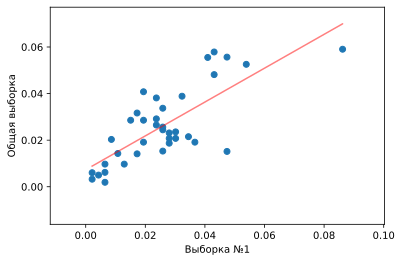

In [105]:
plt.scatter(x,y)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.xlabel('Выборка №1')
plt.ylabel('Общая выборка')
plt.show()

В целом видно, что разброс не слишком большой, значит можно попробовать проверить пару гипотиз, которые могут подтвердиться

## 3.1 Гипотеза 1 
__Гипотеза:__ _"Новый участник группы №1 будет в возрасте 32 лет"_

$
H_0 = 32\\
H_1 < 32 < H_1
$

Распределение нормальное, и $\sigma$ мы можем подсчитать используем $Z$ статистику

$
Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}
$

In [37]:
samples = np.array(df1[df1['age'].notna()]['age'])
mu = 32

In [38]:
def Z_statistic(samples, mu, alpha):
    
    X_ = samples.mean()
    sigma = samples.std(ddof=1)
    n = samples.shape[0]
    
    H_0 = (X_ - mu)/(sigma/n**(1/2))
    
    t1 = stats.norm.ppf(alpha / 2)
    t2 = stats.norm.ppf(1 - alpha / 2)
    
    print(f'{t1} < {H_0} < {t2} = {t1 <= H_0 <= t2}')

In [39]:
Z_statistic(samples=samples, mu=mu, alpha=0.1)

-1.6448536269514729 < -2.265692583467525 < 1.6448536269514722 = False


In [40]:
Z_statistic(samples=samples, mu=mu, alpha=0.05)

-1.9599639845400545 < -2.265692583467525 < 1.959963984540054 = False


In [41]:
Z_statistic(samples=samples, mu=mu, alpha=0.01)

-2.575829303548901 < -2.265692583467525 < 2.5758293035489004 = True


__Результат:__ Гипотеза __не отвергается__ при низком уровне значимости $(\alpha = 0.01)$

Попробуем найти __возрастной интервал__, при котором гипотеза __не отвергалась__ при более высоком уровне значимости.

In [42]:
def confidence_interval1(samples, alpha):
    '''looking for confidence interval'''
    
    X_ = samples.mean()
    n = samples.shape[0]
    sigma = samples.std()
    
    t1 = stats.norm.ppf(alpha/2)
    t2 = stats.norm.ppf(1-alpha/2)
    
    return X_ + t1*(sigma/n**(1/2)), X_ + t2*(sigma/n**(1/2))

In [43]:
confidence_interval1(samples=samples, alpha=0.05)

(29.16764872567782, 31.7935581708739)

In [44]:
confidence_interval1(samples=samples, alpha=0.1)

(29.378737110668006, 31.582469785883717)

Для __уровней значимости $\alpha$ = 0,05 и $\alpha$ = 0,01__ - это интерваты возраста $30 \leq \mu \leq 31$

## 3.2 Гипотеза 2 
__Гипотеза:__ _"Разброс по возрастам в выборке №1 = 12"_

$
H_0 = 146\\
H_1 < 146 < H_1
$

Для проверки дисперсии используем $H$ статистику

$
H = n - 1 \cdot \cfrac{D(X)}{H_0} 
$

In [45]:
variance = 12**2

In [46]:
def H_statistic(samples, variance, alpha):
    
    n = samples.shape[0]
    sample_variance = samples.var(ddof=1)
    
    H_0 = (n - 1) * sample_variance / variance
    
    t1 = stats.chi2.ppf(alpha / 2, df=n-1)
    t2 = stats.chi2.ppf(1 - alpha / 2, df=n-1)
    
    print(f'{t1} < {H_0} < {t2} = {t1 <= H_0 <= t2}')

In [47]:
H_statistic(samples=samples, variance=variance, alpha=0.1)

414.1092432625873 < 670.9293432710735 < 514.1642826067967 = False


In [48]:
H_statistic(samples=samples, variance=variance, alpha=0.05)

405.2741107777168 < 670.9293432710735 < 524.5133224954417 = False


In [49]:
H_statistic(samples=samples, variance=variance, alpha=0.01)

388.37510880537394 < 670.9293432710735 < 545.1346157372133 = False


__Результат:__ Гипотеза __отвергается__

Попробуем найти __интервал дисперсии__, при котором гипотеза была бы __не опровергнута__

In [50]:
def confidence_interval2(samples: np.ndarray, alpha):
    
    n = samples.shape[0]
    sample_variance = samples.var(ddof=1)
    
    t1 = stats.chi2.ppf(alpha / 2, df=n-1)
    t2 = stats.chi2.ppf(1 - alpha / 2, df=n-1)
    
    return ((n-1)*sample_variance / t1)**(1/2), ((n-1)*sample_variance / t2)**(1/2)

In [51]:
confidence_interval2(samples=samples, alpha=0.01)

(15.772260638117066, 13.312749464666075)

Для самого __низкого__ уровня значимости $\alpha = 0.01$ __разброс__ должна быть $13 \leq \sigma \leq 15$

# Вывод:

Анализ целевой аудитории 1й выборки дал следующие результаты:
- Целевая аудитория 1й группы находится на этапе формирования, по сравнению с другими группами
- На данном этапе формирования, аудитория приобретает черты свойственные общей выборке

Состав:
- Аудитория примерно на 7/8 состоит из жителей города Мурманска (Общая на 4/5)
- Аудитория примерно на 6/7 состоит из женщин (Общая на 6/7)
- Аудитория примерно на 1/3 состоит из людей ввозрасте от 28 до 32 лет (Общая на 1/3)
- Аудитория примерно на 1/4 соответствет target

На данный момент оценка разброса между 1й и общей выбоками, показал достаточно большую разницу.